<a href="https://colab.research.google.com/github/derkaiser9423/PythonPracticeProject/blob/master/Assigment_2_s8091335.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 of 3: Linear Regression

In [ ]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

This code resets the environment. It is necessary in each Task.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the necessary libraries.

In [ ]:
import warnings

# To suppress all warnings
warnings.filterwarnings("ignore")

There are some warning message due to version conflict between libraries and IPython. Therefore, it is necessary to mute all unnecessary warning messages.

In [ ]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2951 sha256=f104dd1f9fc65287e81a16cad26698d75e8ce0dafac2d7f36450d4c4e38644b4
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn


sklearn is not available on default PYthon environment, so it needs installing.

In [ ]:
df = pd.read_csv('employee_attrition_team04.csv')

Read the data file.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1029 non-null   int64 
 1   Attrition                 1029 non-null   object
 2   BusinessTravel            1029 non-null   object
 3   DailyRate                 1029 non-null   int64 
 4   Department                1029 non-null   object
 5   DistanceFromHome          1029 non-null   int64 
 6   Education                 1029 non-null   int64 
 7   EducationField            1029 non-null   object
 8   EmployeeCount             1029 non-null   int64 
 9   EmployeeNumber            1029 non-null   int64 
 10  EnvironmentSatisfaction   1029 non-null   int64 
 11  Gender                    1029 non-null   object
 12  HourlyRate                1029 non-null   int64 
 13  JobInvolvement            1029 non-null   int64 
 14  JobLevel                

Get first look into data set.

The limitation is that we cannot acquire much information of the data type (nominal, ordinal, numerical continuous, numerical discrete) from that function. The best practice is openning in MS Excel or Google Speadsheets and applying the "Filter" feature to get insight into them (i.e. data type, data format, data range, encoding). The summary of the dataset is shown below.

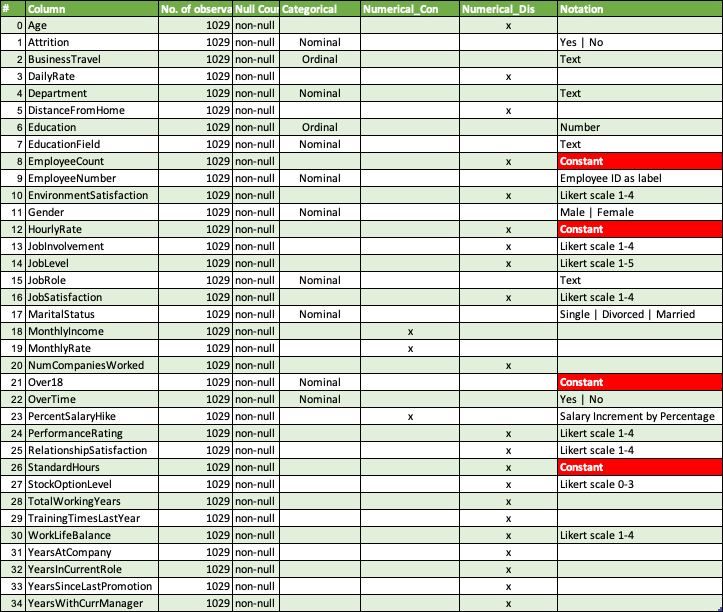

**Notion #1:** While the "Attrition" attribute contains only "Yes" and "No" text values, we would never know how that variable was yielded. Understanding how the "Attrition" values were weighted (or scored, evaluated, measured) will give much useful information toward any statistical modelling technique applied. This is the first notion on the dataset.

**Notion #2:** There is no null value within the dataset (as shown in the results of the infor() function above).

**Notion #3:** Looking closer to the summary table above, several steps should be conducted before statistical analysis:


*   Encoding the "Attrition" variable.
*   Three variables "EmployeeCount", "Over18", and "StandardHours" are removed as they do not help the analysis. They contain constant values only.
*   Take the "EmployeeNumber" to the index of the dataframe as it can be considered as employee ID. (This step may useful for thr further use of the dataset)


**Notion #4:** Because the purpose of the analysis is to find out factors and their condition which lead to employee attrition, variables "Department", "EducationField", "JobRole", "BusinessTravel", and "OverTime" need encoding. The encoding matrix is shown below.

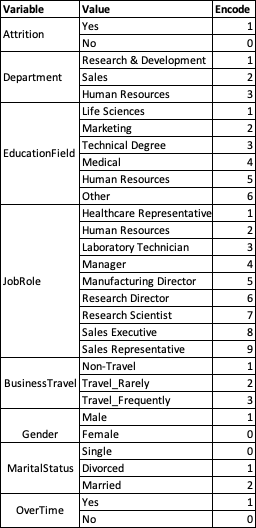


In [ ]:
# Mapping "Attrition" column
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

Values in "Attrition" variable are mapped "1=Yes" and "0=No". It is necessary to use map() function (return Python integer value 0 and 1) instead of loc() function (return Python objects 0 and 1).

In [ ]:
# Drop unnescessary columns
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

Use drop() function to drop three unnecessary columns as mentioned above.

In [ ]:
# Drop the "EmployeeNumber" column.
df = df.drop('EmployeeNumber', axis=1)

As discussed, the "EmployeeNumber" column can be used as the employee ID. However, values in the "EmployeeNumber" column is not helpful. They just only indicate distinct employees.

In [ ]:
# Mapping "Department", "EducationField", "JobRole", and "BusinessTravel" column accordingly to the encoding matrix above
df['Department'] = df['Department'].map({'Research & Development': 1, 'Sales': 2, 'Human Resources':3})
df['EducationField'] = df['EducationField'].map({'Life Sciences': 1, 'Marketing': 2, 'Technical Degree':3, 'Medical': 4, 'Human Resources': 5, 'Other': 6})
df['JobRole'] = df['JobRole'].map({'Healthcare Representative': 1, 'Human Resources': 2, 'Laboratory Technician':3, 'Manager': 4, 'Manufacturing Director': 5, 'Research Director': 6, 'Research Scientist': 7, 'Sales Executive': 8, 'Sales Representative': 9})
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel': 1, 'Travel_Rarely': 2, 'Travel_Frequently':3})
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single':0, 'Divorced':1, 'Married': 2})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

Map the encoding matrix to the dataframe.

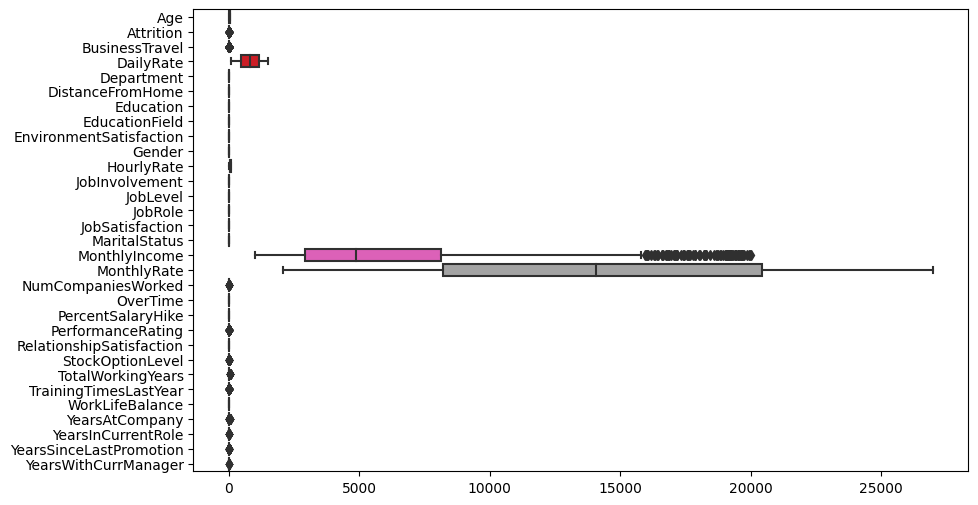

In [ ]:
# Outliers detection using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, palette='bright', orient='h')
plt.show()

The most convenience yet not much accuracy way to check anomalies is using box plot. The boxplot show that "MonthlyIncome" has anomalies. When checking again in Excel (or Spreadsheets), many values in "MonthlyIncome" do not align with the hourly rate, daily rate, standard hours, and monthly rate. For instance, an employee has the hourly rate of 98, daily rate of 1402, standard hours of 80, and monthly rate of 26204, but that employee has the monthly income of 2430. Because the given information does not mention the calculation of the monthly income, which should base on rates, all columns (variables) of rates and income are dropped. An investigation should be conducted on the calculation to give further understanding on how monthly income is calculated before answering the question of factors affect employee's attrition. In practice, a BA or DA has to get information and full description of attributes to understand the basic nature of data to get the most accuracy analysis.

In [ ]:
# Drop more columns
df = df.drop(['DailyRate', 'HourlyRate', 'MonthlyRate', 'MonthlyIncome'], axis=1)

As discussed above, the "DailyRate", "HourlyRate", "MonthlyRate", and "MonthlyIncome" columns are dropped. They should be analyzed after understanding of how to calculate the monthly income as the monthly income is the anomaly. The nature of statistics is to mathematically understand and describe the world, so anomalies in statistics include things that cannot comprehend. Yet, removing those anomalies is not to neglect them, but rather to wait for an investigation.

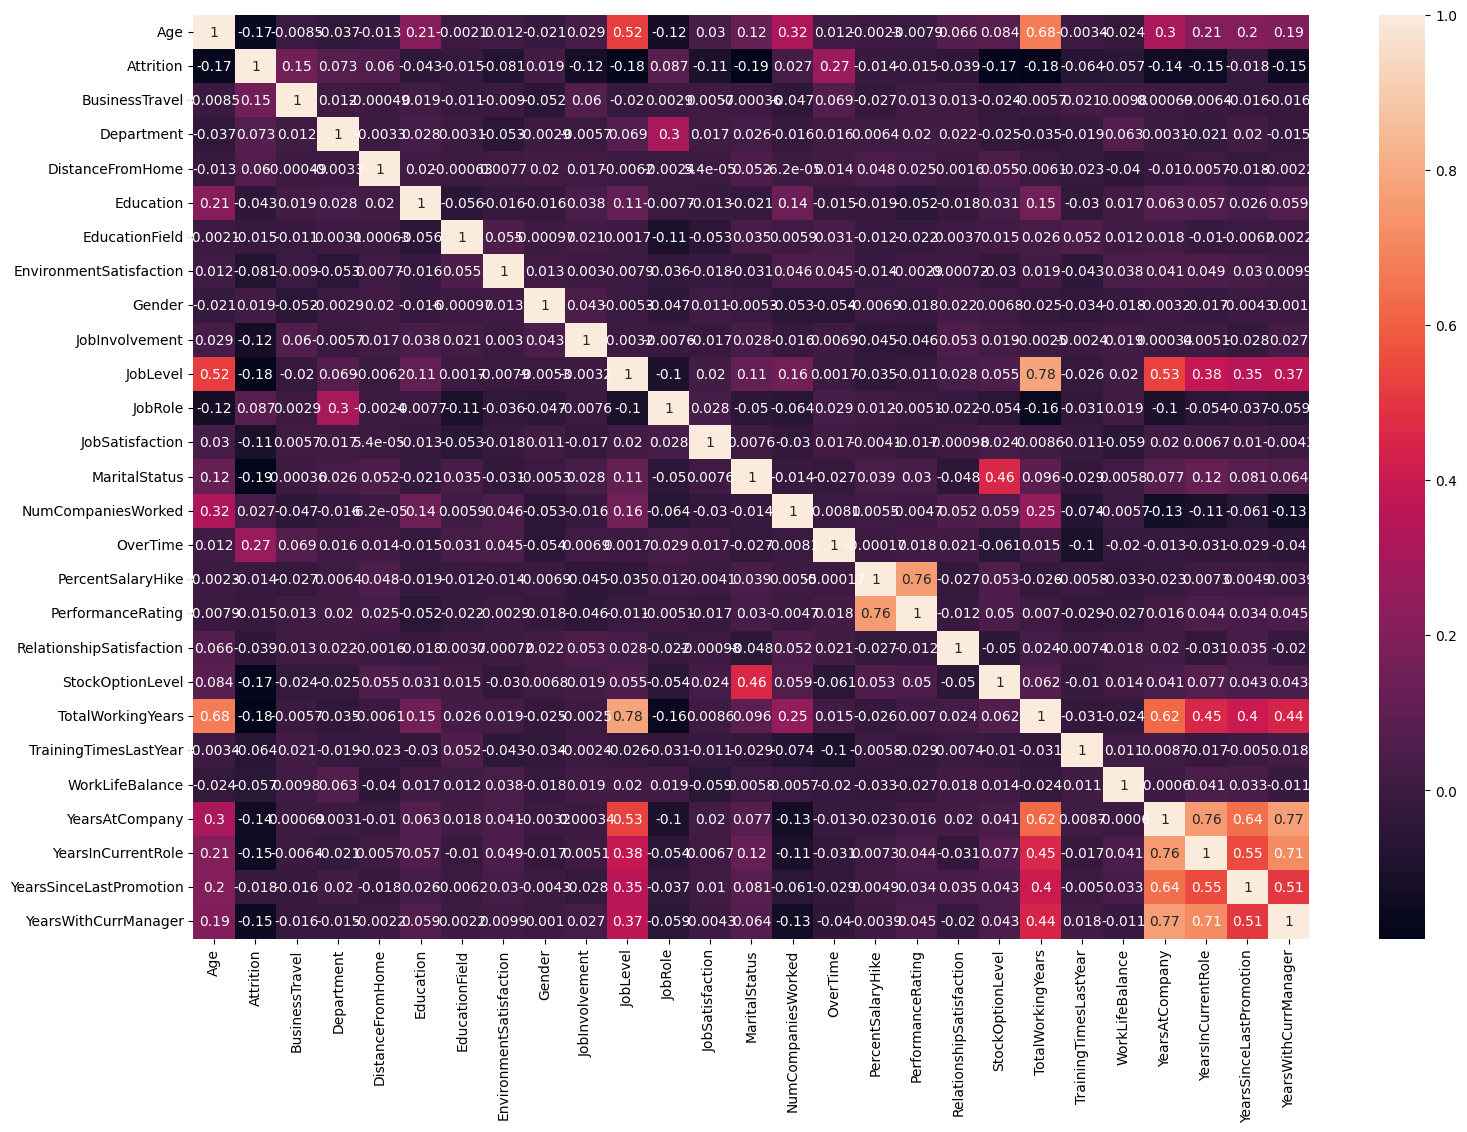

In [ ]:
# Check the correlation coefficient of variables by using heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

The heat map shows that the correlation between the "Attrition" and other variables are low. Rule of thumb says that the low correlation coefficient (<0.7) imply the less likelihood of the potential multicollinearity in the regression.

In [ ]:
# Import sklearn library and its functions, classes for regression
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X = df.drop(['Attrition'], axis=1)
y = df["Attrition"]

Within this case, the "Attrition" is the dependent variable, and others are considered independent variables. So that, it is necessary to separate the dataframe into two sub-dataframes.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

By using the train_test_split in the sklearn library, the independent variables (uppercase X) and the dependent variable (lowercase y) are splited into two proportion of 80% for the train data and 20% for the test data. The pro-rata of 80-20 is statistical convention. However, the size of the data is 1029 observations. It is not indicated that how those observations were chosen, and from which population. That fact is the deterrance of the intepretation of any statistical analysis.

In [ ]:
#scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Scaling the data is important for machine learning models because it can improve the performance of the model. By using the StandardScaler() class in the Preprocessing module of sklearn, the train dataset is now ready for the regression model to learn more effectively.

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

First import the logistic regression model by assigning the LogisticsRegression() class to model variable.
Next, apply (fit) the train data set (X_train, y_train) to the model. The  model learns the coefficients that best fit the training data, which will be used to make predictions later.

In [ ]:
y_pred = model.predict(X_test)

Apply the acquired model to the test data set of the independent variables (X_text). The result is store in the ndarray, named y_pred. Later on, the result (y_pred) is compared to the y_test for the accuracy of the prediction.

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[169   6]
 [ 18  13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       175
           1       0.68      0.42      0.52        31

    accuracy                           0.88       206
   macro avg       0.79      0.69      0.73       206
weighted avg       0.87      0.88      0.87       206



Two measures are apply to get the accuracy of the prediction from the trained logistic model.



1.   Confusion matrix:

* True Negative (169): correctly predicted instances of no attrition employee cases.
* Fasle Positive (6): incorrectly predicted instances of attrition employee cases (attrition but predict no attrition).
* False negative (18): incorrectly predicted instances of no attrition employee cases (no attrition but predict attrition).
* True positive (13): correctly predicted instances of attrition employee cases.


In conclusion, the probability of correct prediction of the attrition is only 68%, while the probability of correct prediction of the no attrition is 90%. The gross probability of correct prediction is 88%, meaning that there is 22% chance of incorrect predictions of the attrition.
2.   

Precision (for true attrition): 0.68

Recall (for true attrition): 0.42

F1-score (for true attrition): 0.52

Support (for true attrition): 31



In [ ]:
intercept = model.intercept_[0]
coefficients = model.coef_[0]
print(f'The coefficients (weights): {coefficients} \n')
print(f'The intercept (bias): {intercept} \n')

The coefficients (weights): [-0.19308005  0.6323765   0.31328292  0.44106575 -0.06839593 -0.09322165
 -0.478068    0.22603234 -0.4224153  -0.31053676 -0.01454345 -0.52803938
 -0.37162138  0.41828257  0.92335736  0.03590778 -0.1185704  -0.1394218
 -0.41961578 -0.65627318 -0.32857592 -0.19279047  0.0239029  -0.1133815
  0.8463155  -0.42800772] 

The intercept (bias): -2.741815135400446 



log(odds of predict the attrition) = intercept + (coef1 * feature1) + (coef2 * feature2) + ...

# Task 2

In [ ]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

Reset the environment.

In [ ]:
import warnings

# To suppress all warnings
warnings.filterwarnings("ignore")

Mute the unnecessary warning message.

In [ ]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

Import necessary libraries.

In [ ]:
df = pd.read_csv('future_500_team04.csv')
print(df.head())

   Unnamed: 0   ID              Name     Industry  Inception  Employees State  \
0         133  134           Sub-Fan     Software     2014.0       24.0    MA   
1         288  289          Annoyhog       Health     2009.0       90.0    FL   
2         443  444      Ridglingshod       Health     2011.0       23.0    CA   
3         245  246  Circinuscategory  IT Services     2013.0       32.0    NJ   
4         240  241     Sounderfibber  IT Services     2011.0      372.0    MN   

         City       Revenue           Expenses     Profit Growth  
0      Boston    $61,78,217  4,916,737 Dollars  1261480.0    17%  
1      Medley  $1,27,29,198  7,494,847 Dollars  5234351.0     9%  
2   San Diego    $82,93,498  8,165,133 Dollars   128365.0     9%  
3    Cranbury  $1,49,20,255  5,274,251 Dollars  9646004.0    28%  
4  Minnetonka  $1,47,27,740  6,403,759 Dollars  8323981.0    21%  


Import the data set and get the first look.

In [ ]:
# Drop first column as it is undefined
df = df.drop(columns=['Unnamed: 0'])

There is a colum without header or column description. So, it needs removing as the data in that column cannot be used.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         350 non-null    int64  
 1   Name       350 non-null    object 
 2   Industry   348 non-null    object 
 3   Inception  350 non-null    float64
 4   Employees  348 non-null    float64
 5   State      347 non-null    object 
 6   City       350 non-null    object 
 7   Revenue    348 non-null    object 
 8   Expenses   347 non-null    object 
 9   Profit     348 non-null    float64
 10  Growth     349 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 30.2+ KB


There are some columns contain null values. It is nescessary to deal with them before formatting data.

In [ ]:
df['Industry'] = df['Industry'].fillna('NA')

It is better to get some neutral words to the nominal data than to remove the rows contain missing value.

In [ ]:
mean_employee_number = df['Employees'].mean()
df['Employees'] = df['Employees'].fillna(mean_employee_number)

Because the data size is relatively small, the discrete missing data can be replace by the mean of existing data.

In [ ]:
empty_State = df[df['State'].isnull()]
print(empty_State)

      ID             Name  Industry  Inception  Employees State  \
236  267       Circlechop  Software     2010.0       14.0   NaN   
251   84       Drilldrill  Software     2010.0       30.0   NaN   
301   11  Canecorporation    Health     2012.0        6.0   NaN   

              City       Revenue           Expenses     Profit Growth  
236  San Francisco    $90,67,070  5,929,828 Dollars  3137242.0    20%  
251  San Francisco    $78,00,620  2,785,799 Dollars  5014821.0    17%  
301       New York  $1,05,97,009  7,591,189 Dollars  3005820.0     7%  


In [ ]:
df.at[236, 'State'] = 'CA'
df.at[251, 'State'] = 'CA'
df.at[301, 'State'] = 'NY'

The state name can be traced back accordingly to the city name. So, 3 missing values can be remediated manually.

In [ ]:
# Remove the $ unit and the string "Dollars" in columns
df['Revenue'] = df['Revenue'].str.replace('$', '')
df['Growth'] = df['Growth'].str.replace('%', '')

df['Inception'] = df['Inception'].astype(int) # Starting year
df['Employees'] = df['Employees'].astype(int) # Number of employee cannot be float
df['Growth'] = df['Growth'].apply(float)

Reformat the data for the further steps.

In [ ]:
df['Inception'] = pd.datetime.now().year - df['Inception']
df = df.rename(columns={'Inception':'Year'})

The column "Inception" contains contradictory values as the older inception year means the higher years old.

In [ ]:
df = df.drop(['Revenue', 'Expenses'], axis=1)

Profit = revenue - expenses. Therefore, it needs keeping only the profit column.

In [ ]:
df = df.dropna(subset=['Profit'])
df = df.dropna(subset=['Growth'])

There are some missing value in the "Profit" and "Growth" columns. As they are necessary in the analysis and the number of missing value in the reflection to other attributes is quite small, all rows with that missing value are removed.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 349
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         348 non-null    int64  
 1   Name       348 non-null    object 
 2   Industry   348 non-null    object 
 3   Year       348 non-null    int64  
 4   Employees  348 non-null    int64  
 5   State      348 non-null    object 
 6   City       348 non-null    object 
 7   Profit     348 non-null    float64
 8   Growth     348 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 27.2+ KB


Take the second look into the dataframe after cleaning step.

In [ ]:
group_profit_by_state = df.groupby('State')['Profit'].sum().reset_index().sort_values('Profit', ascending=False)

Get the dataframe of the gross profit by states.

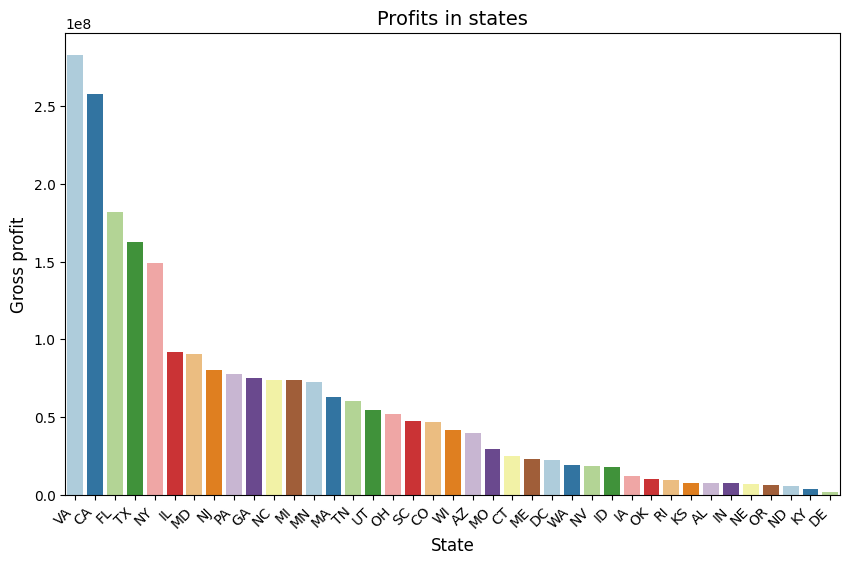

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=group_profit_by_state['State'], y=group_profit_by_state['Profit'], data=group_profit_by_state, palette="Paired")
plt.xlabel('State', fontsize=12)
plt.ylabel('Gross profit', fontsize=12)
plt.title('Profits in states', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

There are 2 groups of states that have significantly higher gross profit compared to others.

* First top 2: VA and CA.
* Next top 3: FL, TX, and NY.

It can be concluded that the distribution of the gross profit of top 500 companies by states is significantly uneven. It reflects in the distance in gross profit between the top 5 and others, and within top 5 also. That insight gives some motivations for the public management domain.

In [ ]:
group_profit_by_city = df.groupby(['City', 'Industry'])['Profit'].sum().reset_index().sort_values('Profit', ascending=False)

In [ ]:
top_cities = group_profit_by_city.head(10)

Get the dataframe of the gross profit by cities. Because of a huge number of cities of the top 500 companies, only top 10 cities of profit are choosen for convenience.

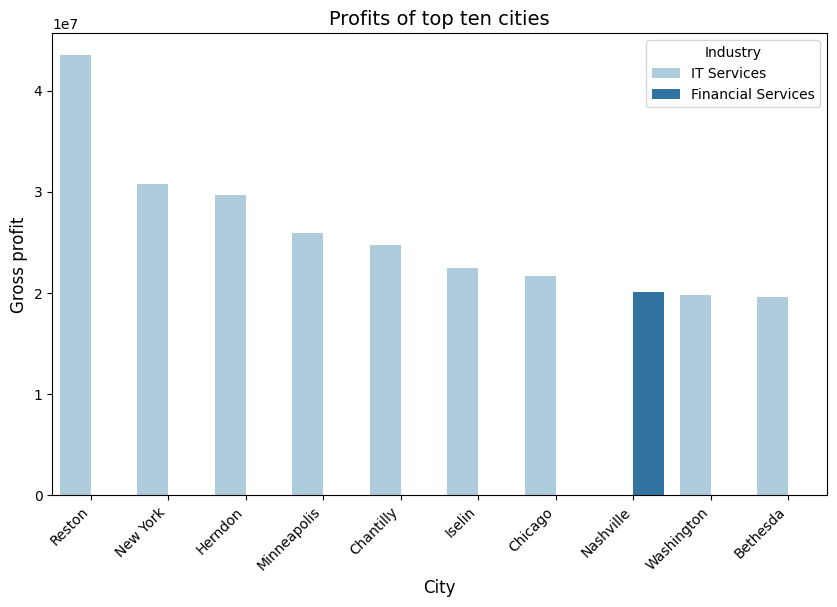

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities['City'], y=top_cities['Profit'], hue='Industry', data=top_cities, palette="Paired")
plt.xlabel('City', fontsize=12)
plt.ylabel('Gross profit', fontsize=12)
plt.title('Profits of top ten cities', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

IT service industry dominates.

In [ ]:
group_profit_by_industry = df.groupby('Industry')['Profit'].sum().reset_index().sort_values('Profit', ascending=False)

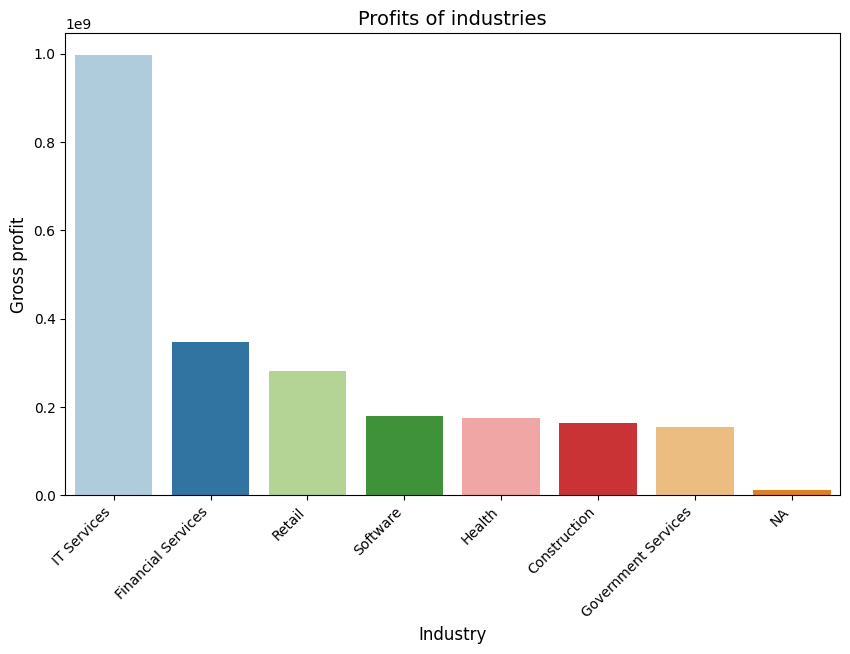

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=group_profit_by_industry['Industry'], y=group_profit_by_industry['Profit'], data=group_profit_by_industry, palette="Paired")
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Gross profit', fontsize=12)
plt.title('Profits of industries', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()

The visualization of the gross profit of industries proves the comment above that IT service industry dominates in the top 500 companies.

In [ ]:
X = df.loc[:, ['Year', 'Employees', 'Profit']]
y = df.loc[:, 'Growth']

The "Year", "Empoyees", and "Profit" are three independent variables, and the "Growth" is the dependent variable. Because the age, the human resource relfected by number of employees, and the profit in the current fiscal year can determine the growth of an business.

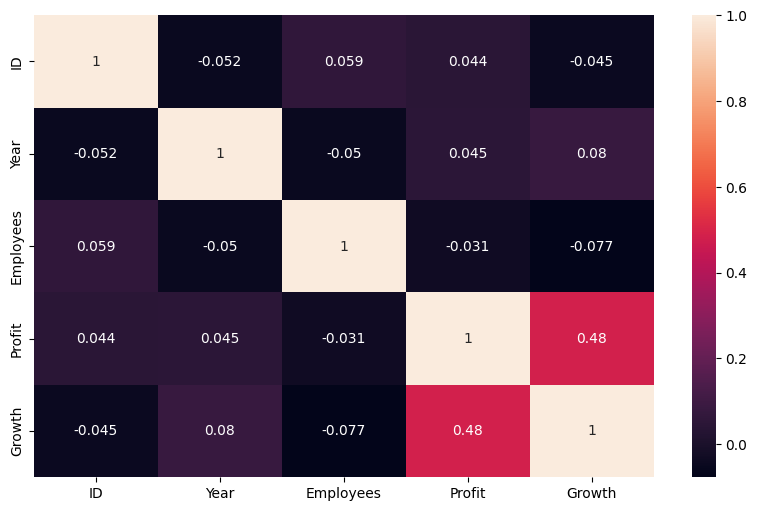

In [ ]:
# Check the correlation coefficient of variables by using heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

Variables are quite unrelated.

In [ ]:
# Import sklearn library and its functions, classes for regression
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Import the libraries.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Split the data into 2 sub-dataset accordingly to the 80-20 ratio.

In [ ]:
#scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

It needs scaling before take the data into model fitting step.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Apply the train data into the model. The coefficients within the model are yielded.

In [ ]:
y_pred = model.predict(X_test)

Get a try to predict the test data set based on the recent trained model.

In [ ]:
# Calculate the error metrics
mse = np.mean((y_pred - y_test)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_pred - y_test))
r2 = model.score(X_test, y_test)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

MSE: 28.054189061418054
RMSE: 5.29662053213349
MAE: 4.398284308615579
R-squared: 0.29290554243400035


Overall, the results of the error metrics suggest that the model is not making very accurate predictions. You can try to improve the performance of the model by adjusting the hyperparameters of the model, or by using a different machine learning algorithm.

In [ ]:
print(model.coef_)

[ 0.37567183 -0.3875213   3.2089411 ]


Drawing the coefficients from the fitted model, an equation of the linear regression can be presents as the following:

Year*0.37 + Employees*(-0.39) + Profit*3.21 = Growth

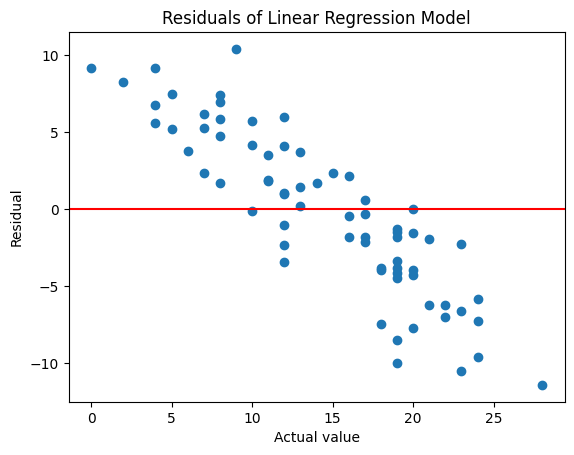

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred - y_test)
plt.axhline(0, color='red')
plt.xlabel('Actual value')
plt.ylabel('Residual')
plt.title('Residuals of Linear Regression Model')
plt.show()

Both the bias and variance are in trouble. The residuals does not disperse randomly and around the axis 0. However, its create a right slope pattern, meaning that the data quality is poor, or the model is not suitable.

# Task 3

In [ ]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

Reset the environment.

In [ ]:
import warnings

# To suppress all warnings
warnings.filterwarnings("ignore")

Mute all warning messages.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

Import necessary libraries. There are some preprocessing modules and the frequent pattern algorithm modules that are essential to apply the Apriori algorithm.

TransactionEncoder tranforms and transposes the data set of recorded purchases in to an tabular data frame.

In [ ]:
df = pd.read_csv('groceries_team04.csv', header=None)

Import the data set. Notice that there is no header of the data set.

In [ ]:
print(df.head())

               0                  1                 2       3              4   \
0             oil                NaN               NaN     NaN            NaN   
1    citrus fruit    root vegetables  other vegetables    salt  bottled water   
2         sausage     hamburger meat  other vegetables  yogurt  cream cheese    
3   bottled water                NaN               NaN     NaN            NaN   
4  tropical fruit  frozen vegetables               NaN     NaN            NaN   

             5              6     7    8    9   ...   19   20   21   22   23  \
0           NaN            NaN   NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
1   chewing gum            NaN   NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
2  meat spreads  bottled water  soda  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
3           NaN            NaN   NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   
4           NaN            NaN   NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   

    24   25   26   27   28  
0  

Take the first look into data frame.

In [ ]:
df.insert(0, 'Item(s)', df.count(axis=1))

We need the column in the first place, counting the items of each purchase.

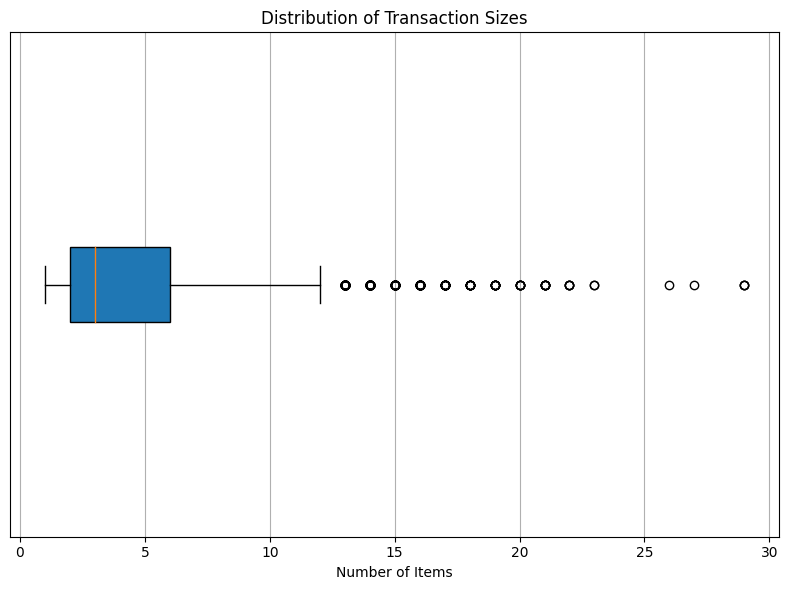

In [ ]:
# Create a box plot to visualize the distribution of transaction sizes and identify outliers
plt.figure(figsize=(8, 6))

# Use patch_artist=True to fill the box plot with colors
plt.boxplot(df['Item(s)'], vert=False, patch_artist=True)

# Customize the plot for better presentation
plt.title("Distribution of Transaction Sizes")
plt.xlabel("Number of Items")
plt.grid(axis="x")  # Show grid lines on the x-axis for better readability
plt.yticks([])  # Remove the labels for the y-axis

plt.tight_layout()

# Show the plot
plt.show()

It can be seen that there are many outliers, and the skewness of the distribution of the data is quite heavy.

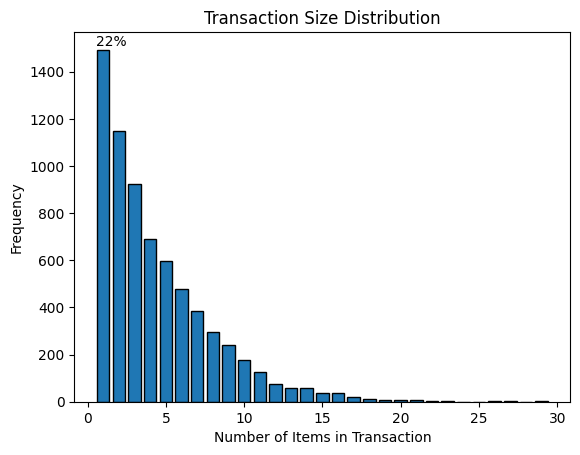

In [ ]:
# Calculate the maximum and minimum transaction sizes
min_size = df['Item(s)'].min()
max_size = df['Item(s)'].max()

# Create bins with a size of 1
bins = list(range(min_size, max_size + 2))

# Create histograms for transaction sizes
plt.hist(df['Item(s)'], bins=bins, edgecolor="black", align="left", rwidth=0.8)
plt.title("Transaction Size Distribution")
plt.xlabel("Number of Items in Transaction")
plt.ylabel("Frequency")

# Calculate the percentage of each number of item in the "Item(s)" column
item_count = df["Item(s)"].value_counts()
total_transactions = len(df["Item(s)"])
percentage_item_purchases = (item_count / total_transactions) * 100

# Get the height (frequency) of the first bar
height_first_bar = plt.gca().patches[0].get_height()

# Set the label for the first bar with the percentage value
plt.annotate(f"{round(percentage_item_purchases[1])}%",
             xy=(bins[0] + 0.5, height_first_bar),
             xytext=(0, 3),
             textcoords="offset points",
             ha='center',
             fontsize=10)

plt.show()

Check the distribution of the data by using histogram to confirm the first comment above.

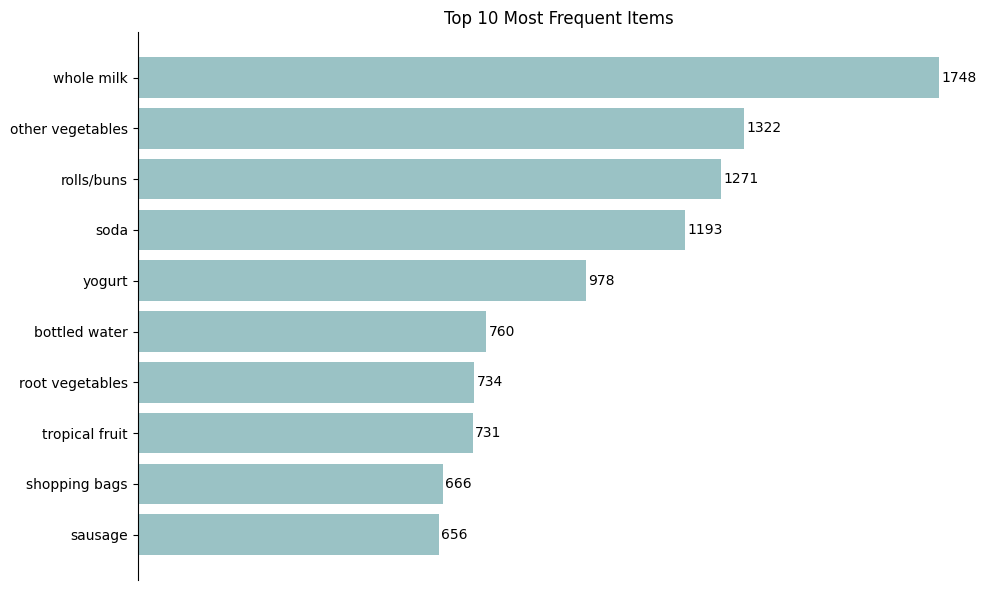

In [ ]:
# Calculate the frequency of each item in the DataFrame by stacking the columns and counting occurrences
item_counts = df.iloc[:, 1:].stack().value_counts()

# Sort items by frequency in descending order
sorted_items_desc = item_counts.sort_values(ascending=False)

# Select the top 10 most frequent items
top_10_items = sorted_items_desc.head(10)

# Create a horizontal bar plot for the top 10 most frequent items
plt.figure(figsize=(10, 6))

# Set the color for the bars
bar_color = "#9AC2C5"

# Plot the horizontal bar chart
bars = plt.barh(range(len(top_10_items)), top_10_items.values, color=bar_color)

# Set y-ticks and labels
plt.yticks(range(len(top_10_items)), top_10_items.index)

# Invert the y-axis
plt.gca().invert_yaxis()

# Remove right, top, and bottom borders
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)

# Remove x-axis ticks and labels
plt.tick_params(axis="x", which="both", bottom=False, labelbottom=False)

# Add values beside the bars
for index, value in enumerate(top_10_items.values):
    plt.text(value + 5, index, str(value), ha="left", va="center")

# Remove grid
plt.grid(False)

# Remove y-axis label and x-axis title
plt.ylabel("")
plt.xlabel("")

# Set title
plt.title("Top 10 Most Frequent Items")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

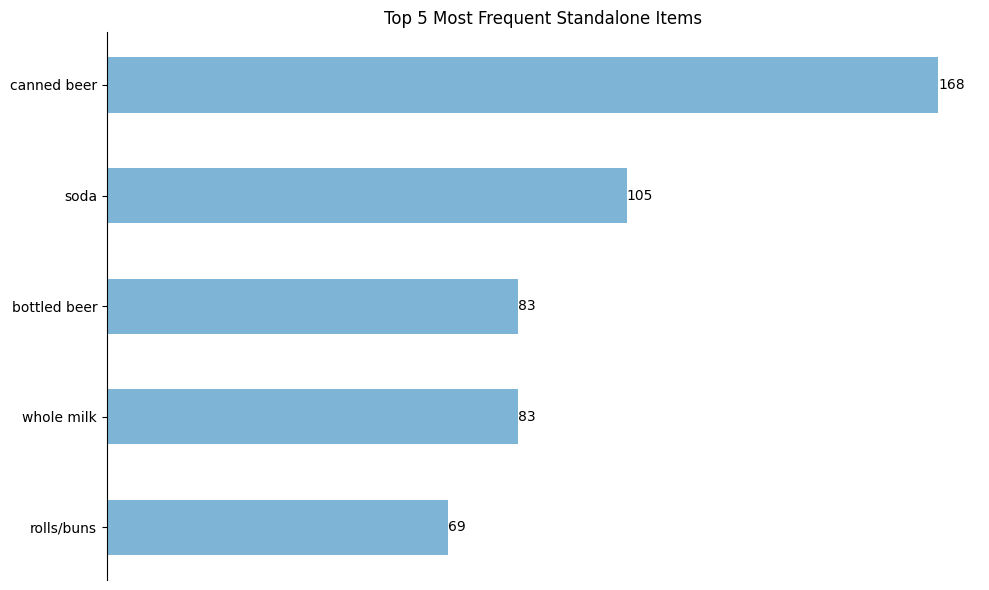

In [ ]:
# Extract the item columns
item_columns = df.columns[1:33]

# Create a new DataFrame to store the standalone purchases (transactions with only one item)
standalone_purchases = df[df["Item(s)"] == 1][item_columns]

# Item Frequency Analysis for Standalone Purchases
standalone_item_counts = standalone_purchases.stack().value_counts()
top_standalone_items = standalone_item_counts.head(5)  # Get the top 5 most frequent standalone items

# Create a horizontal bar plot for the top 5 most frequent standalone items
plt.figure(figsize=(10, 6))  # Set the figure size

# Set the color for the bars
bar_color = "#7EB5D6"

# Plot the horizontal bar chart with the specified color
plt.barh(top_standalone_items.index, top_standalone_items.values, color=bar_color, height=0.5)

# Remove y-axis label and x-axis title
plt.ylabel("")
plt.xlabel("")

plt.title("Top 5 Most Frequent Standalone Items")

# Add frequency values above each bar
for index, value in enumerate(top_standalone_items.values):
    plt.text(value, index, str(value), ha="left", va="center", color="black")

# Invert the y-axis to display items with the highest frequency on top
plt.gca().invert_yaxis()

# Remove x-axis ticks and labels
plt.tick_params(axis="x", which="both", bottom=False, labelbottom=False)

# Remove grid
plt.grid(False)

# Remove right and top spines for cleaner aesthetics
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)

plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Extract the item columns
item_columns = df.columns[1:33]

# Convert the data into a list of transactions
transactions = df[item_columns].apply(lambda row: row.dropna().tolist(), axis=1).tolist()

# Create a one-hot encoded DataFrame for the transactions
onehot_transactions = pd.DataFrame(transactions)

# Apply one-hot encoding
onehot_encoded = pd.get_dummies(onehot_transactions.unstack()).groupby(level=1).max()

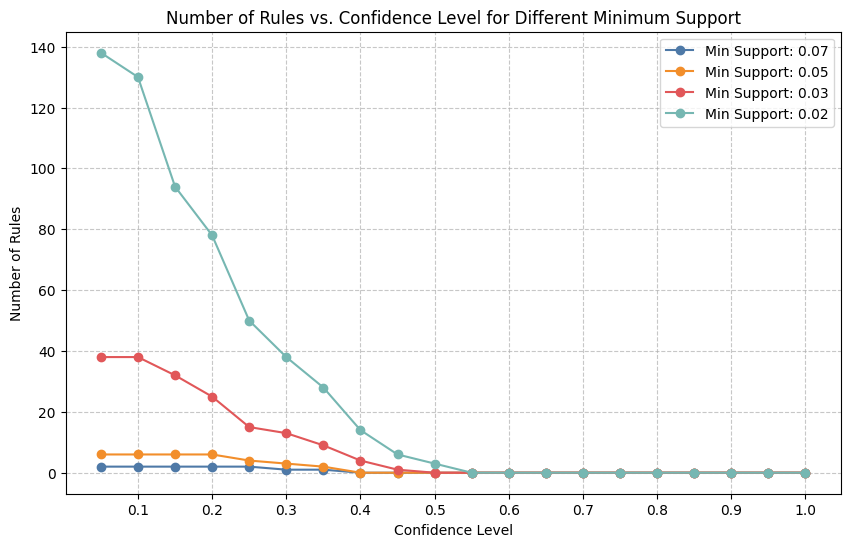

In [ ]:
# List of minimum support values
min_support_values = [0.07, 0.05, 0.03, 0.02]

# Confidence levels to evaluate
confidence_levels = list(np.arange(0.05, 1.05, 0.05))

# Empty lists to store results
num_rules_lists = []

# Calculate and store the number of rules for each combination of minimum support and confidence level
for min_support in min_support_values:
    frequent_itemsets = apriori(onehot_encoded, min_support=min_support, use_colnames=True)
    rules_list = []
    for confidence_level in confidence_levels:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_level)
        num_rules = len(rules)
        rules_list.append(num_rules)
    num_rules_lists.append(rules_list)

# Plot the results
plt.figure(figsize=(10, 6))

colors = ["#4e79a7", "#f28e2b", "#e15759", "#76b7b2"]

for i, min_support in enumerate(min_support_values):
    plt.plot(confidence_levels, num_rules_lists[i], marker="o", color=colors[i], label=f"Min Support: {min_support}")

plt.xlabel("Confidence Level")
plt.ylabel("Number of Rules")
plt.title("Number of Rules vs. Confidence Level for Different Minimum Support")

# Set the desired x-axis labels
plt.xticks([0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1])

# Add grid lines for better readability
plt.grid(True, linestyle="--", alpha=0.7)

plt.legend()
plt.show()

In [ ]:
# Run Apriori algorithm with a minimum support threshold of 0.03
frequent_itemsets = apriori(onehot_encoded, min_support=0.03, use_colnames=True)

# Sort the frequent itemsets DataFrame by 'support' in descending order and reset the index
sorted_frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False).reset_index(drop=True)

# Calculate the length of each itemset and add it as a new column 'length' to the sorted frequent itemsets DataFrame
sorted_frequent_itemsets["length"] = sorted_frequent_itemsets["itemsets"].apply(len)

# Display the sorted frequent itemsets DataFrame with the option to show all rows and columns, set precision to 3 decimal places
with pd.option_context("display.max_rows", None,
                       "display.max_columns", None,
                       "display.precision", 3,
                       ):
  print(sorted_frequent_itemsets)

    support                             itemsets  length
0     0.254                         (whole milk)       1
1     0.192                   (other vegetables)       1
2     0.185                         (rolls/buns)       1
3     0.173                               (soda)       1
4     0.142                             (yogurt)       1
5     0.110                      (bottled water)       1
6     0.107                    (root vegetables)       1
7     0.106                     (tropical fruit)       1
8     0.097                      (shopping bags)       1
9     0.095                            (sausage)       1
10    0.089                             (pastry)       1
11    0.083                       (citrus fruit)       1
12    0.081                       (bottled beer)       1
13    0.081                         (newspapers)       1
14    0.078                        (canned beer)       1
15    0.076       (other vegetables, whole milk)       2
16    0.074                    

In [ ]:
# Generate association rules
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Sort the association rules by 'lift' metric in descending order and reset the index
sorted_association_rules = association_rules_df.sort_values(by="lift", ascending=False).reset_index(drop=True)

# Display the sorted association rules DataFrame
print("\nAssociation Rules:")
sorted_association_rules


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(root vegetables),(other vegetables),0.106624,0.192040,0.046485,0.435967,2.270196,0.026009,1.432471,0.626287
1,(domestic eggs),(whole milk),0.067548,0.253922,0.031668,0.468817,1.846303,0.014516,1.404560,0.491582
2,(whipped/sour cream),(whole milk),0.072196,0.253922,0.032394,0.448692,1.767046,0.014062,1.353287,0.467862
3,(tropical fruit),(other vegetables),0.106188,0.192040,0.035009,0.329685,1.716758,0.014616,1.205345,0.467108
4,(root vegetables),(whole milk),0.106624,0.253922,0.046339,0.434605,1.711568,0.019265,1.319569,0.465359
5,(yogurt),(other vegetables),0.142069,0.192040,0.043870,0.308793,1.607968,0.016587,1.168913,0.440708
6,(tropical fruit),(whole milk),0.106188,0.253922,0.042417,0.399453,1.573131,0.015454,1.242330,0.407608
7,(other vegetables),(whole milk),0.192040,0.253922,0.075683,0.394100,1.552050,0.026920,1.231354,0.440233
8,(yogurt),(whole milk),0.142069,0.253922,0.054765,0.385481,1.518105,0.018690,1.214083,0.397799
9,(citrus fruit),(whole milk),0.082946,0.253922,0.031958,0.385289,1.517351,0.010896,1.213705,0.371796


The code used in this part 3 comes from RAYHAND RAFAEL on Kaggle.com (Available at: https://www.kaggle.com/code/rayhandrafael/market-basket-analysis-using-apriori-algorithm#Item-Frequency-Analysis). Small modification was added based on the given data set. All explanations and comments in this notebook are authentic, reflecting student's understanding.